In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import  KDTree, BallTree
import matplotlib.pyplot as plt

In [2]:
def data_extraction(data_path):
    data = pd.read_csv(data_path)
    data.drop(columns=['Name'], inplace=True)
    feature = data.keys()[:-1]
    X = data.to_numpy(dtype='float64')
    y = X[:, -1]
    X = X[:, :-1]
    return X, y

def result(truth, prediction):
    threshold = 0.1
    error = prediction - truth
    MSE = np.sum(np.power(error, 2)) / error.shape[0]
    print(f'Accuracy under the threshold {threshold}: {len(truth[abs(truth - prediction) <= threshold]) / len(truth) * 100}')
    print(f'MSE: {MSE}')
    compare = [truth, prediction]
    compare = np.array(compare)
    compare = compare.transpose()
    compare.sort(axis=0)
    x = list(range(len(compare)))
    Tplot = plt.scatter(x, compare[:, 0], s=2)
    Pplot = plt.scatter(x, compare[:, 1], s=2)
    plt.legend(handles=[Pplot, Tplot], labels=['y_pred', 'y_truth'])
    plt.show()

In [3]:
train_data_path = './dataset/train.csv'
test_data_path = './dataset/test.csv'
filter_data_path = './dataset/filter_train_data.csv'
X_train, y_train = data_extraction(train_data_path)
X_test, y_test = data_extraction(test_data_path)
X_filter, y_filter = data_extraction(filter_data_path)


## Linear Regression

In [4]:
def linear_regression(X_train, y_train, X_test, y_test):
    LR = LinearRegression()
    threshold = 0.1
    LR.fit(X_train, y_train)
    prediction = LR.predict(X_test)
    print(f'Score: {LR.score(X_test, y_test) * 100}')
    result(y_test, prediction)


Score: 56.324254327592996
Accuracy under the threshold 0.1: 43.04635761589404
MSE: 0.04099663202720404


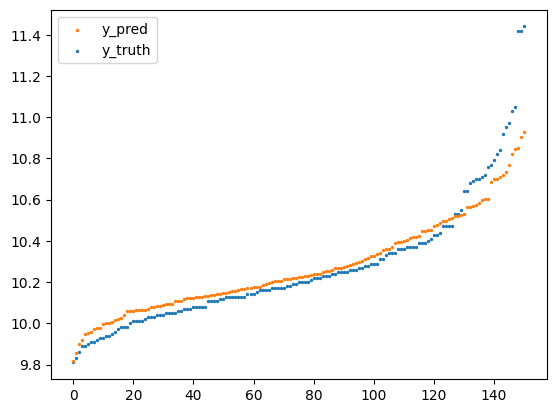

Score: 60.55846000500529
Accuracy under the threshold 0.1: 46.35761589403973
MSE: 0.03702215673406583


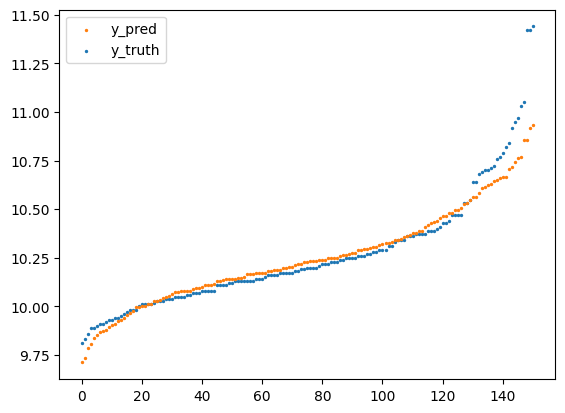

In [5]:
linear_regression(X_train, y_train, X_test, y_test)
linear_regression(X_filter, y_filter, X_test, y_test)


## Neural Network

In [125]:
def deep_learning(X_train, y_train, X_test, y_test, batch_size=10, lr=1e-5, hidden_layer=20):
    MLP = MLPRegressor(random_state=10, hidden_layer_sizes=hidden_layer, batch_size=batch_size, verbose=True, learning_rate_init=lr, max_iter=5000)
    MLP.fit(X_train, y_train)
    prediction = MLP.predict(X_test)
    print(f'Score: {MLP.score(X_test, y_test) * 100}')
    result(y_test, prediction)

Iteration 1, loss = 42.86000997
Iteration 2, loss = 35.92344436
Iteration 3, loss = 31.17992341
Iteration 4, loss = 28.21881474
Iteration 5, loss = 26.54913981
Iteration 6, loss = 25.65810422
Iteration 7, loss = 25.24305327
Iteration 8, loss = 25.04261031
Iteration 9, loss = 24.95864444
Iteration 10, loss = 24.90335790
Iteration 11, loss = 24.85877840
Iteration 12, loss = 24.81931509
Iteration 13, loss = 24.78593276
Iteration 14, loss = 24.73995492
Iteration 15, loss = 24.70292780
Iteration 16, loss = 24.65574285
Iteration 17, loss = 24.61131904
Iteration 18, loss = 24.57807543
Iteration 19, loss = 24.52369833
Iteration 20, loss = 24.48094519
Iteration 21, loss = 24.43413217
Iteration 22, loss = 24.38755769
Iteration 23, loss = 24.34295822
Iteration 24, loss = 24.29614728
Iteration 25, loss = 24.24698998
Iteration 26, loss = 24.19900892
Iteration 27, loss = 24.15140798
Iteration 28, loss = 24.10215515
Iteration 29, loss = 24.05270292
Iteration 30, loss = 24.00386673
Iteration 31, loss 

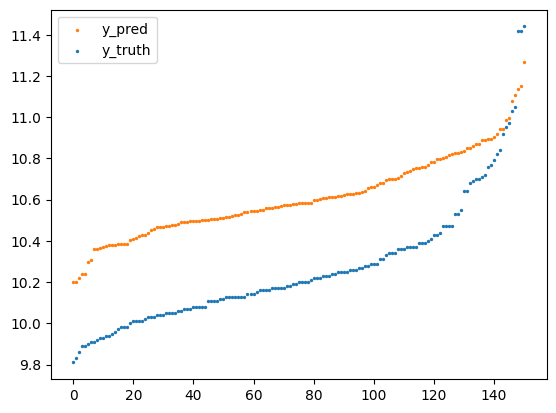

Iteration 1, loss = 65.75168554
Iteration 2, loss = 54.99406738
Iteration 3, loss = 47.19055083
Iteration 4, loss = 41.56770453
Iteration 5, loss = 37.96417243
Iteration 6, loss = 35.66792293
Iteration 7, loss = 34.23252795
Iteration 8, loss = 33.47729793
Iteration 9, loss = 33.00633954
Iteration 10, loss = 32.79389154
Iteration 11, loss = 32.62988631
Iteration 12, loss = 32.55508409
Iteration 13, loss = 32.47787088
Iteration 14, loss = 32.41946791
Iteration 15, loss = 32.36540025
Iteration 16, loss = 32.31305030
Iteration 17, loss = 32.24974614
Iteration 18, loss = 32.19026851
Iteration 19, loss = 32.14533799
Iteration 20, loss = 32.08577876
Iteration 21, loss = 32.02156756
Iteration 22, loss = 31.95412179
Iteration 23, loss = 31.89152930
Iteration 24, loss = 31.84656172
Iteration 25, loss = 31.78031952
Iteration 26, loss = 31.71326831
Iteration 27, loss = 31.64151255
Iteration 28, loss = 31.57647329
Iteration 29, loss = 31.51282389
Iteration 30, loss = 31.44323344
Iteration 31, loss 

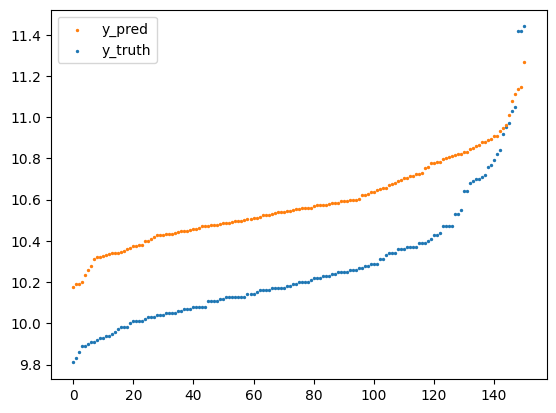

In [139]:
layers = (10, 10, 10, 10)
deep_learning(X_train, y_train, X_test, y_test, hidden_layer=layers, batch_size=100, lr=5e-6)
deep_learning(X_filter, y_filter, X_test, y_test, hidden_layer=layers,batch_size=50, lr=5e-6)


## SVM

In [8]:
def svm(X_train, y_train, X_test, y_test):
    svr = SVR(kernel='poly', degree=20, C=8.5)
    svr.fit(X_train, y_train)
    prediction = svr.predict(X_test)
    print(f'Score: {svr.score(X_test, y_test) * 100}')
    result(y_test, prediction)
    


Score: 53.13513612406023
Accuracy under the threshold 0.1: 38.41059602649007
MSE: 0.04399012655073521


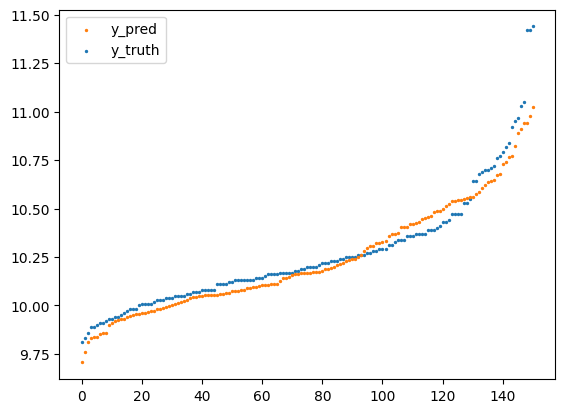

Score: 50.73113067335906
Accuracy under the threshold 0.1: 34.437086092715234
MSE: 0.04624666791795115


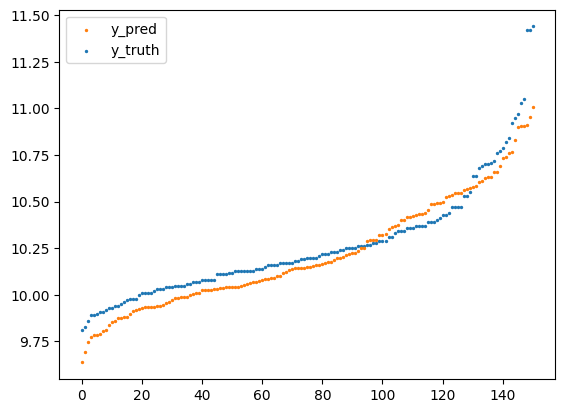

In [9]:
svm(X_train, y_train, X_test, y_test)
svm(X_filter, y_filter, X_test, y_test)


## Nearest Neighbor Regression

In [10]:
def kd(X_train, y_train, X_test, y_test):
    tree = KDTree(X_train)
    neighbor = list(int(ele[0]) for ele in tree.query(X_test, return_distance=False))
    prediction = y_train[neighbor]
    result(y_test, prediction)

Accuracy under the threshold 0.1: 26.490066225165563
MSE: 0.13674238410596024


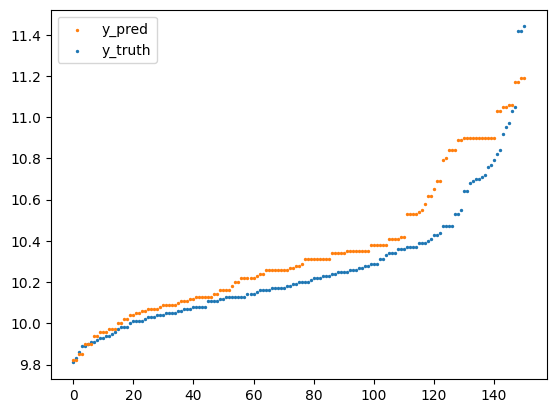

Accuracy under the threshold 0.1: 24.503311258278146
MSE: 0.13496622516556286


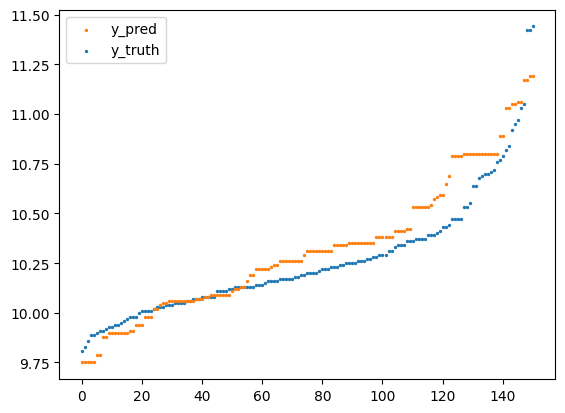

In [11]:
kd(X_train, y_train, X_test, y_test)
kd(X_filter, y_filter, X_test, y_test)


In [12]:
def ball(X_train, y_train, X_test, y_test):
    tree = BallTree(X_train)
    neighbor = list(int(ele[0]) for ele in tree.query(X_test, return_distance=False))
    prediction = y_train[neighbor]
    result(y_test, prediction)

Accuracy under the threshold 0.1: 26.490066225165563
MSE: 0.13674238410596024


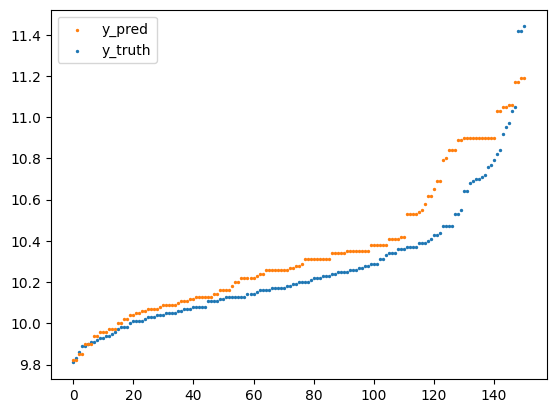

Accuracy under the threshold 0.1: 24.503311258278146
MSE: 0.13496622516556286


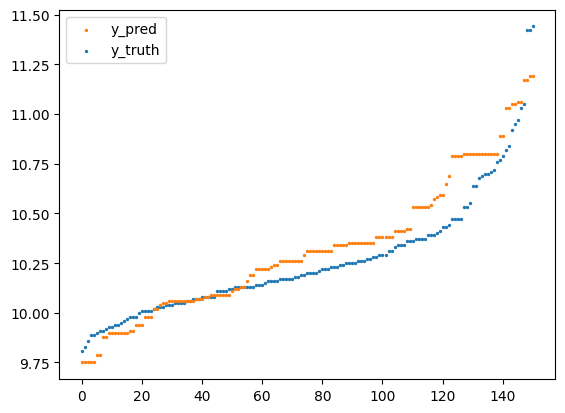

In [13]:
ball(X_train, y_train, X_test, y_test)
ball(X_filter, y_filter, X_test, y_test)